In [1]:
import datetime
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.animation import FuncAnimation
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14
mpl.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\BrancaLab\\Desktop\\Yihan\\installers\\ffmpeg-7.0.1-essentials_build\\bin\\ffmpeg.exe'
from cmap import Colormap

import numpy as np
import SimpleITK as sitk
from scipy.signal import find_peaks, peak_widths
from scipy.stats import ttest_ind
from skimage.exposure import histogram
from skimage.restoration import denoise_bilateral
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu
from skimage.morphology import disk, rectangle, ellipse
from skimage.morphology import binary_dilation, binary_erosion
from skimage.morphology import opening, remove_small_holes, remove_small_objects
from skimage.transform import pyramid_expand
from skimage.measure import label, regionprops
from sklearn.linear_model import LinearRegression

from utils import *
from hu_utils import *

In [2]:
# base_dir = 'Images'
# idx_list = np.arange(500)
# offset = 5  # shift between pre and post xenon slices

# low_post_maps = []
# high_post_maps = []
# low_pre_maps = []
# high_pre_maps = []

# trim = [200, 370, 115, 365]  # region of interest
# # trim = None

# for idx in idx_list:

#     path_low_post = get_scan_paths(base_dir, 'POST_LOW')[idx + offset]
#     path_high_post = get_scan_paths(base_dir, 'POST_HIGH')[idx + offset]
#     path_low_pre = get_scan_paths(base_dir, 'PRE_LOW')[idx]
#     path_high_pre = get_scan_paths(base_dir, 'PRE_HIGH')[idx]
    
#     low_post_hu = load_hu(path_low_post, trim)
#     high_post_hu = load_hu(path_high_post, trim)
#     low_pre_hu = load_hu(path_low_pre, trim)
#     high_pre_hu = load_hu(path_high_pre, trim)

#     # show_pair((low_post_hu, high_post_hu), (-200, 100))
#     # show_pair((low_pre_hu, high_pre_hu), (-200, 100))
    
#     low_post_maps.append(low_post_hu)
#     high_post_maps.append(high_post_hu)
#     low_pre_maps.append(low_pre_hu)
#     high_pre_maps.append(high_pre_hu)
    
# low_post_maps = np.array(low_post_maps)
# high_post_maps = np.array(high_post_maps)

# Image registration

In [3]:
# def register_images_bspline(fixed, moving):
#     fixed_img = sitk.GetImageFromArray(fixed.astype(np.float32))
#     moving_img = sitk.GetImageFromArray(moving.astype(np.float32))
    
#     reg_method = sitk.ImageRegistrationMethod()                 # initialize image registration method
#     reg_method.SetMetricAsCorrelation()                         # similarity metric
#     reg_method.SetInterpolator(sitk.sitkLinear)                 # interpolator
    
#     transform_bspline = sitk.BSplineTransformInitializer(fixed_img,
#                                                          [10, 10],  # Grid size of the B-spline control points
#                                                          order=3)   # B-spline order
#     reg_method.SetInitialTransform(transform_bspline)
#     reg_method.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5,
#                                     numberOfIterations=500,
#                                     maximumNumberOfCorrections=5)
    
#     final_transform = reg_method.Execute(fixed_img, moving_img) # execute the registration
#     moving_resampled = sitk.Resample(moving_img, fixed_img,
#                                      final_transform,
#                                      sitk.sitkLinear,
#                                      0.0,
#                                      moving_img.GetPixelID())   # apply transform to moving image
    
#     fixed_img = sitk.Bilateral(fixed_img, domainSigma=1.0, rangeSigma=20.0, numberOfRangeGaussianSamples=100)
#     moving_resampled = sitk.Bilateral(moving_resampled, domainSigma=1.0, rangeSigma=20.0, numberOfRangeGaussianSamples=100)
    
#     return sitk.GetArrayFromImage(fixed_img), sitk.GetArrayFromImage(moving_resampled), final_transform


In [4]:
# These codes are used for generating the registed maps

# registered_high_post_maps = []
# registered_low_post_maps = []
# registered_high_pre_maps = []
# registered_low_pre_maps = []


# for i in range(500):
#     print(f'Processing image {i}')
#     low_post_hu = low_post_maps[i]
#     high_post_hu = high_post_maps[i]
#     low_pre_hu = low_pre_maps[i]
#     high_pre_hu = high_pre_maps[i]

#     registered_high_post_hu, registered_high_pre_hu, transform_mat = register_images_bspline(high_post_hu, high_pre_hu)

#     low_pre_img = sitk.GetImageFromArray(low_pre_hu)
#     low_post_img = sitk.GetImageFromArray(low_post_hu)

#     registered_low_pre_img = sitk.Resample(low_pre_img, low_post_img,
#                                            transform_mat,
#                                            sitk.sitkLinear,
#                                            0.0,
#                                            low_pre_img.GetPixelID())
#     registered_low_pre_hu = sitk.GetArrayFromImage(registered_low_pre_img)
#     registered_low_post_hu = low_post_hu
    
#     registered_high_post_maps.append(registered_high_post_hu)
#     registered_low_post_maps.append(registered_low_post_hu)
#     registered_high_pre_maps.append(registered_high_pre_hu)
#     registered_low_pre_maps.append(registered_low_pre_hu)
    
# registered_high_post_maps = np.array(registered_high_post_maps)
# registered_low_post_maps = np.array(registered_low_post_maps)
# registered_high_pre_maps = np.array(registered_high_pre_maps)
# registered_low_pre_maps = np.array(registered_low_pre_maps)

# np.save('output\\REG_140KV_POST.npy', registered_high_post_maps)
# np.save('output\\REG_80KV_POST.npy', registered_low_post_maps)
# np.save('output\\REG_140KV_PRE.npy', registered_high_pre_maps)
# np.save('output\\REG_80KV_PRE.npy', registered_low_pre_maps)

In [5]:
registered_high_post_maps = np.load('registered\\REG_140KV_POST.npy')
registered_low_post_maps = np.load('registered\\REG_80KV_POST.npy')
registered_high_pre_maps = np.load('registered\\REG_140KV_PRE.npy')
registered_low_pre_maps = np.load('registered\\REG_80KV_PRE.npy')

# Image segmentation

In [6]:
low_post_filtered_maps = []
high_post_filtered_maps = []

for low, high in zip(registered_low_post_maps, registered_high_post_maps):
    low = denoise_bilateral(low, sigma_color=5, sigma_spatial=2)
    high = denoise_bilateral(high, sigma_color=5, sigma_spatial=2)
    
    low_post_filtered_maps.append(low)
    high_post_filtered_maps.append(high)
    
low_post_filtered_maps = np.array(low_post_filtered_maps)
high_post_filtered_maps = np.array(high_post_filtered_maps)

## HU restrictions

### BAT

In [7]:
brown_mask_stack = []
difference_map_stack = []
brown_rim_stack = []

for idx in range(500):
    sample_low = low_post_filtered_maps[idx, ...]
    sample_high = high_post_filtered_maps[idx, ...]

    mask = np.ones_like(sample_low)
    mask = np.logical_and(mask, ((sample_low >= -130) & (sample_low <= 0)))
    mask = np.logical_and(mask, ((sample_high >= -130) & (sample_high <= 0)))
    mask = np.logical_and(mask, (sample_high - 30 < sample_low))
    
    # mask = opening(mask, disk(1))
    mask = binary_erosion(mask, disk(2))
    mask = remove_small_objects(mask, 64)
    
    dilate = binary_dilation(mask)
    erode = binary_erosion(mask)
    rim = np.logical_and(dilate, ~erode)
    
    difference_map = np.where(mask, sample_low - sample_high, -100)
    
    brown_mask_stack.append(mask)
    difference_map_stack.append(difference_map)
    brown_rim_stack.append(rim)
    
brown_mask_stack = np.array(brown_mask_stack)
difference_map_stack = np.array(difference_map_stack)

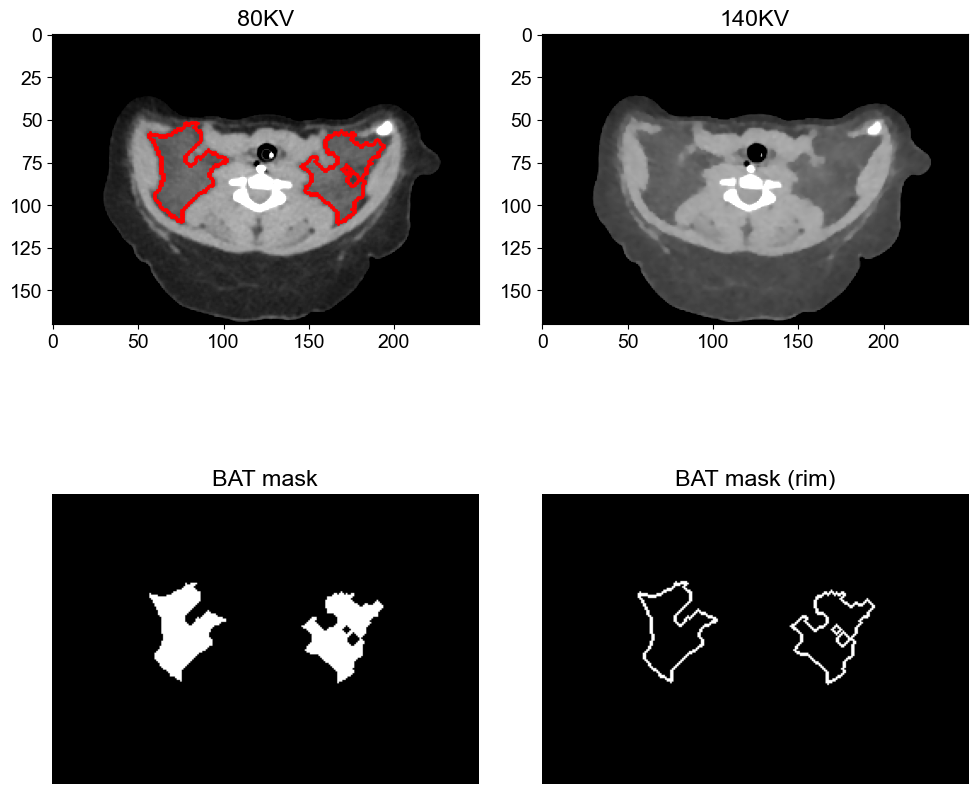

In [8]:
idx = 210
sample_low = registered_low_post_maps[idx, ...]
sample_high = registered_high_post_maps[idx, ...]
sample_mask = brown_mask_stack[idx, ...]
sample_diff = difference_map_stack[idx, ...]
sample_rim = brown_rim_stack[idx]

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(sample_low, cmap='gray', vmin=-200, vmax=200)
for ry, rx in zip(np.nonzero(sample_rim)[0], np.nonzero(sample_rim)[1]):
    plt.plot(rx, ry, 'rs', ms=1)
plt.title('80KV')
# plt.axis('off')

plt.subplot(222)
plt.imshow(sample_high, cmap='gray', vmin=-200, vmax=200)
plt.title('140KV')
# plt.axis('off')

plt.subplot(223)
plt.imshow(sample_mask, cmap='gray')
plt.title('BAT mask')
plt.axis('off')

plt.subplot(224)
plt.imshow(sample_rim, cmap='gray')
plt.title('BAT mask (rim)')
plt.axis('off')

plt.tight_layout()
plt.show()

### WAT

In [9]:
white_mask_stack = []
white_rim_stack = []

for idx in range(500):
    sample_low = low_post_filtered_maps[idx, ...]
    sample_high = high_post_filtered_maps[idx, ...]

    white_mask = np.ones_like(sample_low)
    white_mask = np.logical_and(white_mask, ((sample_low >= -200) & (sample_low <= 0)))
    white_mask = np.logical_and(white_mask, ((sample_high >= -200) & (sample_high <= 0)))
    white_mask = np.logical_and(white_mask, (sample_high > sample_low))
    
    white_mask = binary_erosion(white_mask, disk(5))
    white_mask = remove_small_objects(white_mask, 32)
    
    dilate = binary_dilation(white_mask)
    erode = binary_erosion(white_mask)
    rim = np.logical_and(dilate, ~erode)
    
    white_mask_stack.append(white_mask)
    white_rim_stack.append(rim)

white_mask_stack = np.array(white_mask_stack)
white_rim_stack = np.array(white_rim_stack)

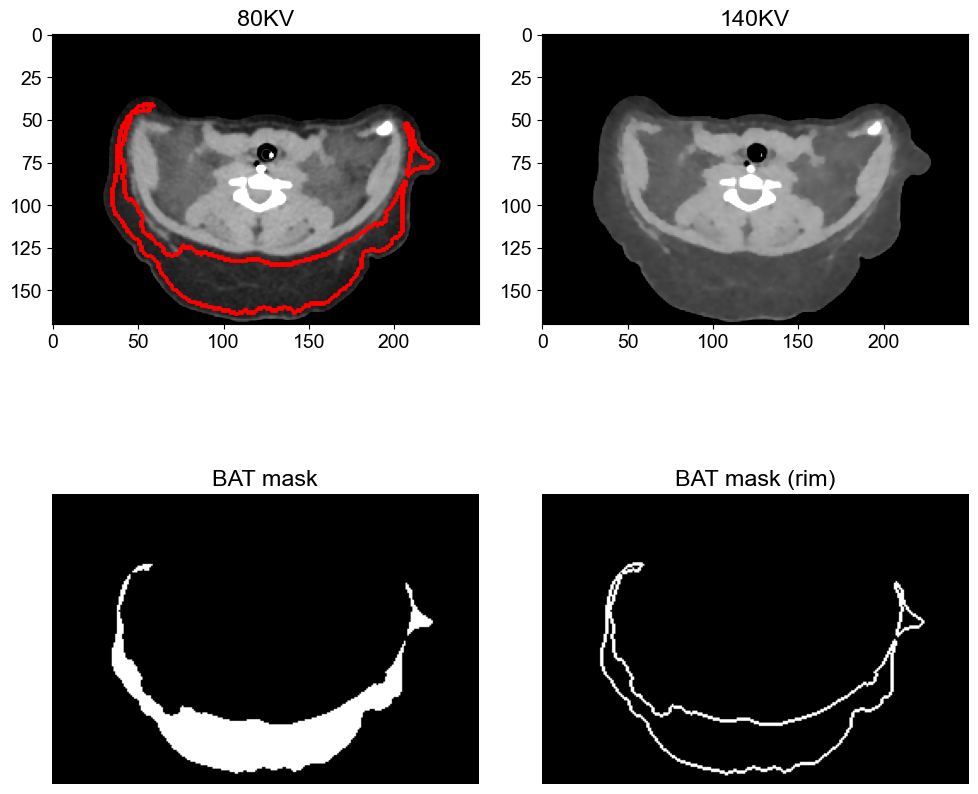

In [10]:
idx = 210
sample_low = registered_low_post_maps[idx, ...]
sample_high = registered_high_post_maps[idx, ...]
sample_white_mask = white_mask_stack[idx, ...]
sample_diff = difference_map_stack[idx, ...]
sample_rim = white_rim_stack[idx]

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(sample_low, cmap='gray', vmin=-200, vmax=200)
for ry, rx in zip(np.nonzero(sample_rim)[0], np.nonzero(sample_rim)[1]):
    plt.plot(rx, ry, 'rs', ms=1)
plt.title('80KV')
# plt.axis('off')

plt.subplot(222)
plt.imshow(sample_high, cmap='gray', vmin=-200, vmax=200)
plt.title('140KV')
# plt.axis('off')

plt.subplot(223)
plt.imshow(sample_white_mask, cmap='gray')
plt.title('BAT mask')
plt.axis('off')

plt.subplot(224)
plt.imshow(sample_rim, cmap='gray')
plt.title('BAT mask (rim)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# write_decom(low_post_filtered_maps, 'output\\80KV.DCM', series_name='low')
# write_decom(high_post_filtered_maps, 'output\\140KV.DCM', series_name='high')
# write_decom(brown_mask_stack, 'output\\MASK.DCM', series_name='mask')
# write_decom(white_mask_stack, 'output\\WHITE_MASK.DCM', series_name='white_mask')
# write_decom(difference_map_stack, 'output\\DIFF_MAP.DCM', series_name='diff')

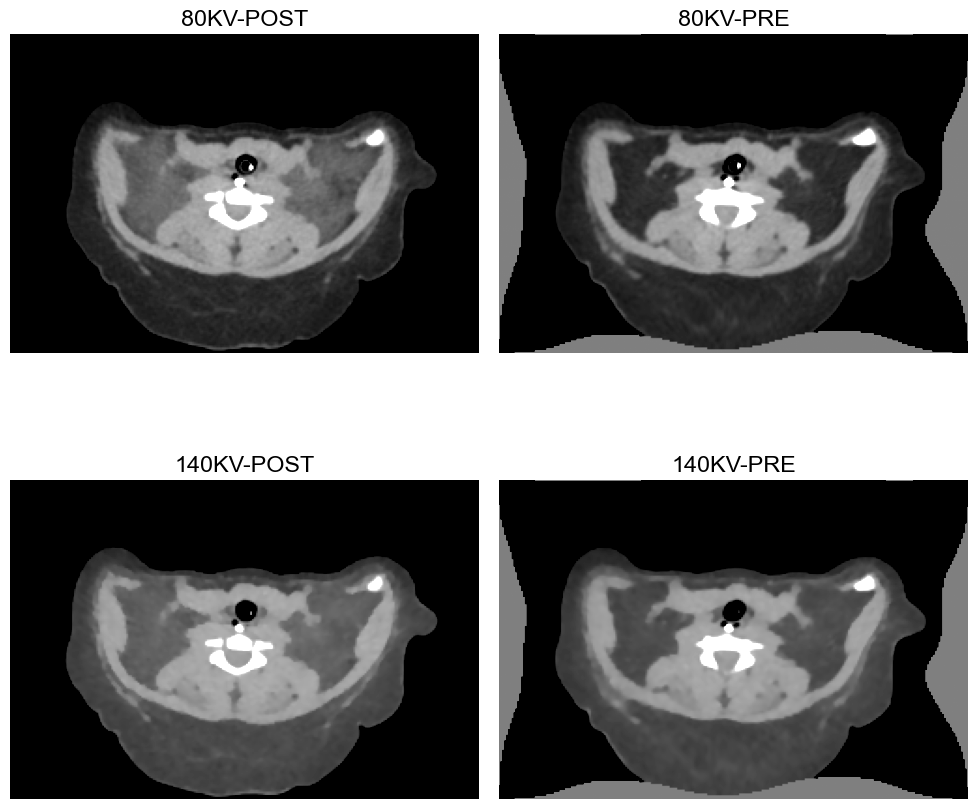

In [12]:
idx = 210

sample_reg_low_post = registered_low_post_maps[idx]
sample_reg_low_pre = registered_low_pre_maps[idx]
sample_reg_high_post = registered_high_post_maps[idx]
sample_reg_high_pre = registered_high_pre_maps[idx]

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(sample_reg_low_post, cmap='gray', vmin=-200, vmax=200)
plt.title('80KV-POST')
plt.axis('off')

plt.subplot(222)
plt.imshow(sample_reg_low_pre, cmap='gray', vmin=-200, vmax=200)
plt.title('80KV-PRE')
plt.axis('off')

plt.subplot(223)
plt.imshow(sample_reg_high_post, cmap='gray', vmin=-200, vmax=200)
plt.title('140KV-POST')
plt.axis('off')

plt.subplot(224)
plt.imshow(sample_reg_high_pre, cmap='gray', vmin=-200, vmax=200)
plt.title('140KV-PRE')
plt.axis('off')

plt.tight_layout()
plt.show()

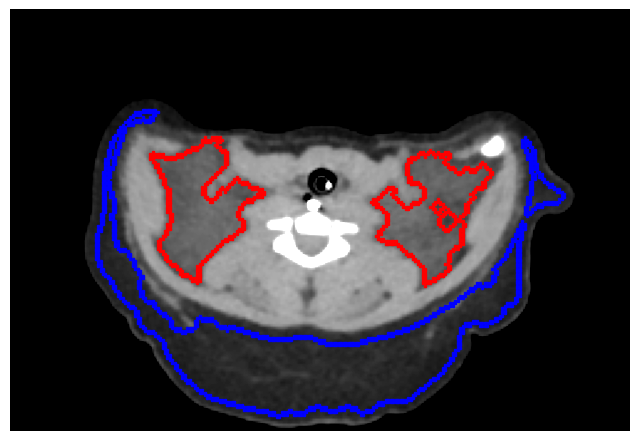

In [13]:
plt.figure(figsize=(8, 8))

sample_rim = brown_rim_stack[idx]
sample_white_rim = white_rim_stack[idx]

plt.imshow(sample_reg_low_post, cmap='gray', vmin=-200, vmax=200)
for ry, rx in zip(np.nonzero(sample_rim)[0], np.nonzero(sample_rim)[1]):
    plt.plot(rx, ry, 'rs', ms=2)
for ry, rx in zip(np.nonzero(sample_white_rim)[0], np.nonzero(sample_white_rim)[1]):
    plt.plot(rx, ry, 'bs', ms=2)
    
plt.axis('off')
plt.show()

### Histogram

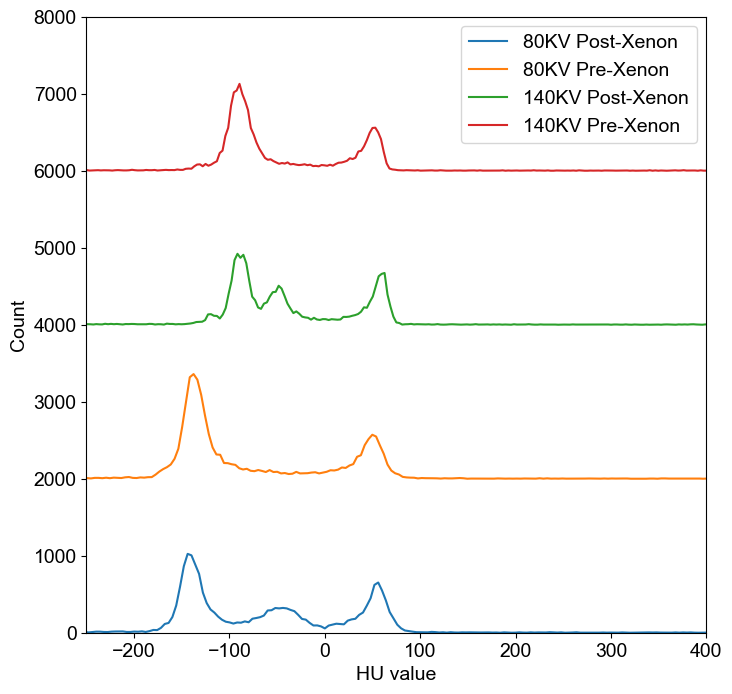

In [14]:
hist_low_post, bin_centers_low_post = histogram(sample_reg_low_post, 1024)
hist_high_post, bin_centers_high_post = histogram(sample_reg_high_post, 1024)
# remove the border that introduced by the registration
hist_low_pre, bin_centers_low_pre = histogram(sample_reg_low_pre[sample_reg_low_pre != 0], 1024)
hist_high_pre, bin_centers_high_pre = histogram(sample_reg_high_pre[sample_reg_high_pre != 0], 1024)

plt.figure(figsize=(8, 8))

plt.plot(bin_centers_low_post, hist_low_post, label='80KV Post-Xenon')
plt.plot(bin_centers_low_pre, hist_low_pre + 2000, label='80KV Pre-Xenon')
plt.plot(bin_centers_high_post, hist_high_post + 4000, label='140KV Post-Xenon')
plt.plot(bin_centers_high_pre, hist_high_pre + 6000, label='140KV Pre-Xenon')
plt.xlim(-250, 400)
plt.ylim(0, 8000)

plt.xlabel('HU value')
plt.ylabel('Count')
plt.legend()
plt.show()

### Statistics

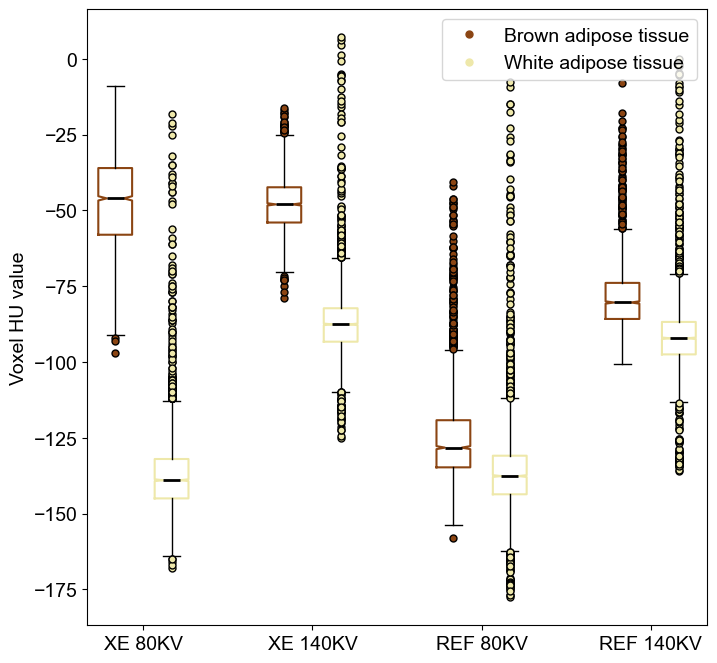

In [15]:
idx = 210
sample_mask = brown_mask_stack[idx]
sample_white_mask = white_mask_stack[idx]

white_size = len(sample_reg_low_post[sample_white_mask])
brown_size = len(sample_reg_low_post[sample_mask])

data = np.vstack((np.pad(sample_reg_low_post[sample_mask], (0, white_size - brown_size), constant_values=np.nan),
                  sample_reg_low_post[sample_white_mask],
                  np.pad(sample_reg_high_post[sample_mask], (0, white_size - brown_size), constant_values=np.nan),
                  sample_reg_high_post[sample_white_mask],
                  np.pad(sample_reg_low_pre[sample_mask], (0, white_size - brown_size), constant_values=np.nan),
                  sample_reg_low_pre[sample_white_mask],
                  np.pad(sample_reg_high_pre[sample_mask], (0, white_size - brown_size), constant_values=np.nan),
                  sample_reg_high_pre[sample_white_mask])).T

data = np.ma.masked_invalid(data)

plt.figure(figsize=(8, 8))

positions = []
for i in range(4):
    positions.append(i * 3 + 1)
    positions.append(i * 3 + 2)

boxprops_brown = dict(linestyle='-', linewidth=1.5, color='saddlebrown')
boxprops_yellow = dict(linestyle='-', linewidth=1.5, color='palegoldenrod')
medianprops = dict(linestyle='-', linewidth=2, color='black')
flierprops_brown = dict(marker='o', markerfacecolor='saddlebrown', markersize=5, linestyle='none')
flierprops_yellow = dict(marker='o', markerfacecolor='palegoldenrod', markersize=5, linestyle='none')

# Creating the box plots
for i in range(8):
    boxprops = boxprops_brown if i % 2 == 0 else boxprops_yellow
    flierprops = flierprops_brown if i % 2 == 0 else flierprops_yellow
    plt.boxplot(data[:, i].compressed(), positions=[positions[i]], patch_artist=False, notch=True, vert=1, widths=0.6, 
                boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)
plt.xticks([1.5, 4.5, 7.5, 10.5], ['XE 80KV', 'XE 140KV', 'REF 80KV', 'REF 140KV'])
plt.ylabel('Voxel HU value')

# Adding legend
brown_patch = plt.Line2D([], [], color='saddlebrown', marker='o', linestyle='None', markersize=5, label='Brown adipose tissue')
yellow_patch = plt.Line2D([], [], color='palegoldenrod', marker='o', linestyle='None', markersize=5, label='White adipose tissue')
plt.legend(handles=[brown_patch, yellow_patch], loc='upper right')

plt.show()

In [16]:
group1 = data[:, 6].data
group1 = group1[~np.isnan(group1)]

group2 = data[:, 7].data
group2 = group2[~np.isnan(group2)]

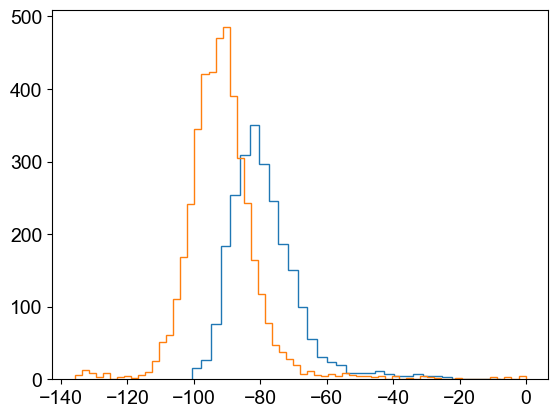

In [17]:
counts1, bins1 = np.histogram(group1, bins=32)
counts2, bins2 = np.histogram(group2, bins=64)
plt.stairs(counts1, bins1)
plt.stairs(counts2, bins2)

In [18]:
res = ttest_ind(group1, group2)
res

TtestResult(statistic=43.87221599822552, pvalue=0.0, df=6801.0)

## Animation (please don't run this section)

In [19]:
# # Parameters
# start_idx = 0
# end_idx = 499
# interval_start = -200
# interval_end = 0
# frame_interval = 20  # milliseconds between frames
# output_file = 'segmentation_animation.mp4'

# # Initialize the figure
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# # Function to update the plot for each frame
# def update(idx):
#     sample_reg_low_post = registered_low_post_maps[idx]

#     hist, bin_centers = histogram(sample_reg_low_post, 1024)
#     peaks, _ = find_peaks(hist, prominence=(50, None))
#     results_half = peak_widths(hist, peaks, rel_height=0.65)
#     start_indices = results_half[2].astype(int)
#     end_indices = results_half[3].astype(int)

#     interval_peaks = [bin_centers[peak] for peak in peaks if interval_start <= bin_centers[peak] <= interval_end]

#     mask = np.zeros_like(sample_reg_low_post, dtype=bool)

#     ax1.clear()
#     ax2.clear()

#     if len(interval_peaks) == 2:
#         greater_peak_center = max(interval_peaks)
#         greater_peak_idx = np.where(bin_centers == greater_peak_center)[0][0]

#         # Find the start and end of the segment for the greater peak
#         start = start_indices[np.where(peaks == greater_peak_idx)[0][0]]
#         end = end_indices[np.where(peaks == greater_peak_idx)[0][0]]
        
#         ax1.fill_between(bin_centers[start:end+1], hist[start:end+1], color='r', alpha=0.3)
#         mask |= (sample_reg_low_post >= bin_centers[start]) & (sample_reg_low_post <= bin_centers[end])
            
#     # Plot all the threshold lines
#     for start, end in zip(start_indices, end_indices):
#         ax1.axvline(bin_centers[start], color='g', linestyle='--')
#         ax1.axvline(bin_centers[end], color='g', linestyle='--')
    
#     mask = remove_small_objects(mask, 128)
#     mask = remove_small_holes(mask, 128)

#     ax1.plot(bin_centers, hist)
#     ax1.set_xlim(-500, 1000)
#     ax1.set_ylim(0, 3500)

#     ax2.imshow(sample_reg_low_post, cmap='gray', vmin=-200, vmax=200)
#     ax2.imshow(mask, cmap='copper', alpha=0.2)
#     ax2.axis('off')

#     ax1.set_title(f'Histogram for image index: {idx}')
#     ax2.set_title(f'Segmented Image index: {idx}')

# ani = FuncAnimation(fig, update, frames=range(start_idx, end_idx + 1), interval=frame_interval)
# ani.save(output_file, writer='ffmpeg', dpi=300)

# Material Decomposition

## Use tissue as reference

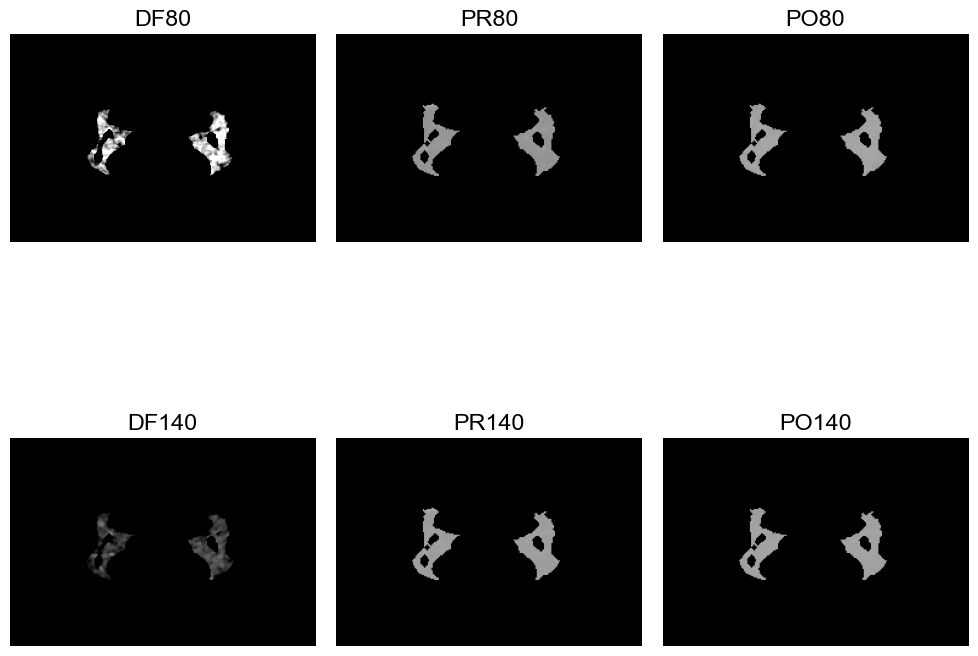

In [158]:
idx = 200

DF80_2D = np.where(brown_mask_stack[idx], registered_low_post_maps[idx] - registered_low_pre_maps[idx], 0)
PR80_2D = np.where(brown_mask_stack[idx], registered_low_pre_maps[idx] + 1000, 0)
PO80_2D = np.where(brown_mask_stack[idx], registered_low_post_maps[idx] + 1000, 0)
DF80 = DF80_2D.reshape(-1, 1)
PR80 = PR80_2D.reshape(-1, 1)
PO80 = PO80_2D.reshape(-1, 1)
DF80 = DF80[DF80 != 0][:, np.newaxis]
PR80 = PR80[PR80 != 0][:, np.newaxis]
PO80 = PO80[PO80 != 0][:, np.newaxis]

DF140_2D = np.where(brown_mask_stack[idx], registered_high_post_maps[idx] - registered_high_pre_maps[idx], 0)
PR140_2D = np.where(brown_mask_stack[idx], registered_high_pre_maps[idx] + 1000, 0)
PO140_2D = np.where(brown_mask_stack[idx], registered_high_post_maps[idx] + 1000, 0)
DF140 = DF140_2D.reshape(-1, 1)
PR140 = PR140_2D.reshape(-1, 1)
PO140 = PO140_2D.reshape(-1, 1)
DF140 = DF140[DF140 != 0][:, np.newaxis]
PR140 = PR140[PR140 != 0][:, np.newaxis]
PO140 = PO140[PO140 != 0][:, np.newaxis]

plt.figure(figsize=(10, 10))

plt.subplot(231)
plt.imshow(DF80_2D, cmap='gray', vmin=50, vmax=100)
plt.title('DF80')
plt.axis('off')

plt.subplot(232)
plt.imshow(PR80_2D, cmap='gray', vmin=0, vmax=1500)
plt.title('PR80')
plt.axis('off')

plt.subplot(233)
plt.imshow(PO80_2D, cmap='gray', vmin=0, vmax=1500)
plt.title('PO80')
plt.axis('off')

plt.subplot(234)
plt.imshow(DF140_2D, cmap='gray', vmin=0, vmax=100)
plt.title('DF140')
plt.axis('off')

plt.subplot(235)
plt.imshow(PR140_2D, cmap='gray', vmin=0, vmax=1500)
plt.title('PR140')
plt.axis('off')

plt.subplot(236)
plt.imshow(PO140_2D, cmap='gray', vmin=0, vmax=1500)
plt.title('PO140')
plt.axis('off')

plt.tight_layout()
plt.show()

In [159]:
reg_df = LinearRegression(fit_intercept=True).fit(DF80, DF140)
slope_df = reg_df.coef_.item()
intercept_df = reg_df.intercept_.item()
print(reg_df.score(DF80, DF140))

reg_pr = LinearRegression(fit_intercept=True).fit(PR80, PR140)
slope_pr = reg_pr.coef_.item()
intercept_pr = reg_pr.intercept_.item()
print(reg_pr.score(PR80, PR140))

0.6528261758164664
0.7815743066847973


(-100.0, 150.0)

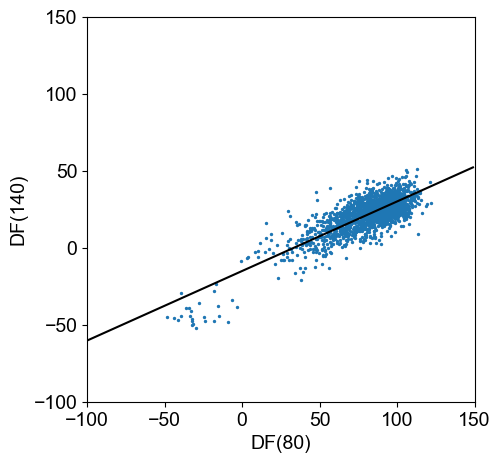

In [160]:
plt.figure(figsize=(5, 5))
plt.scatter(DF80, DF140, s=2)

reg_x_df = np.arange(-100, 150, 1)
reg_y_df = slope_df * reg_x_df + intercept_df
plt.plot(reg_x_df, reg_y_df, 'k')
plt.xlabel('DF(80)')
plt.ylabel('DF(140)')

plt.xlim(-100, 150)
plt.ylim(-100, 150)

Text(0, 0.5, 'PR(140)')

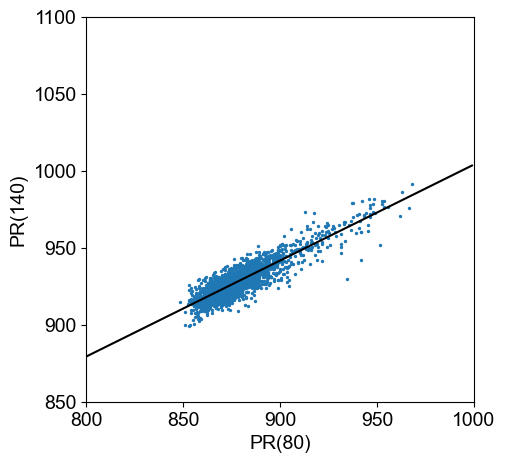

In [161]:
plt.figure(figsize=(5, 5))
plt.scatter(PR80, PR140, s=2)

reg_x_pr = np.arange(800, 1000, 1)

reg_y_pr = slope_pr * reg_x_pr + intercept_pr
plt.plot(reg_x_pr, reg_y_pr, 'k')

plt.xlim(800, 1000)
plt.ylim(850, 1100)

plt.xlabel('PR(80)')
plt.ylabel('PR(140)')

In [162]:
sf = slope_pr
sx = slope_df
cf = intercept_pr
cx = intercept_df


hu_f_80 = np.max(PR80)
hu_f_140 = (hu_f_80) * sf
hu_x_80 = np.max(DF80)
hu_x_140 = (hu_x_80) * sx

print(hu_x_140)

55.12974204528992


In [163]:
A = np.array([[hu_f_80, hu_x_80],
              [hu_f_140, hu_x_140]])
print(A)
AINV = np.linalg.inv(A)
print(AINV)

[[968.25779912 122.05149121]
 [603.25586186  55.12974205]]
[[-0.00272266  0.00602769]
 [ 0.02979266 -0.0478188 ]]


In [166]:
sample_idx = 225
sample_low = registered_low_post_maps[sample_idx, ...]
sample_high = registered_high_post_maps[sample_idx, ...]

sample_flat = np.vstack((sample_low.reshape(1, -1), sample_high.reshape(1, -1)))
decomp_flat = np.matmul(AINV, sample_flat)
material1 = decomp_flat[0].reshape(sample_low.shape)
material2 = decomp_flat[1].reshape(sample_low.shape)

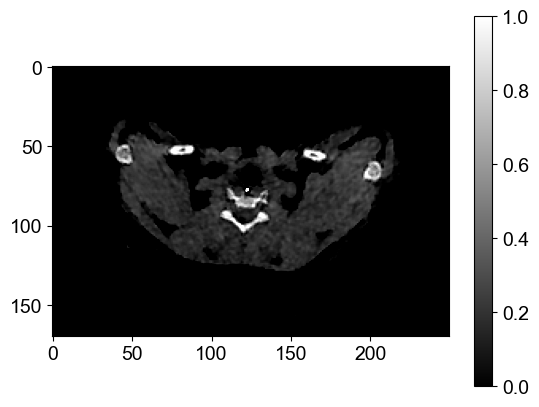

In [168]:
sample_brown_mask = brown_mask_stack[sample_idx]
sample_white_mask = white_mask_stack[sample_idx]

# plt.imshow(np.where(np.logical_or(sample_brown_mask, sample_white_mask), material1, np.nan), cmap='gray', vmin=-1, vmax=1)
plt.imshow(material1, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

## Use phantom as reference

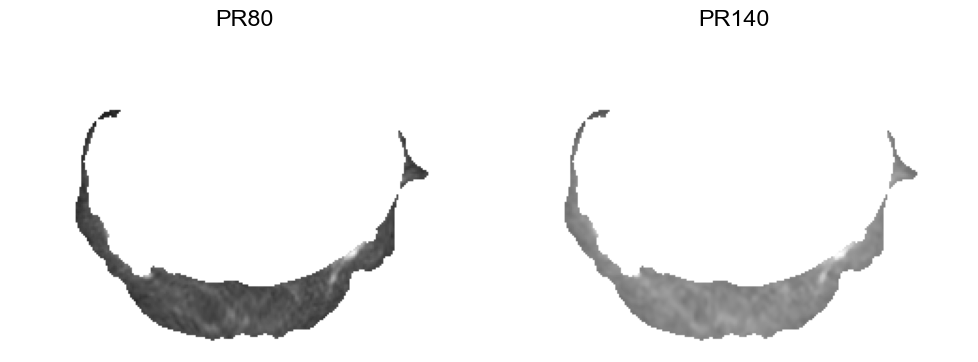

In [70]:
idx = 210

PR80_2D = np.where(white_mask_stack[idx], registered_low_pre_maps[idx], 0)
PR80 = PR80_2D.reshape(-1, 1)
PR80 = PR80[PR80 != 0][:, np.newaxis]

PR140_2D = np.where(white_mask_stack[idx], registered_high_pre_maps[idx], 0)
PR140 = PR140_2D.reshape(-1, 1)
PR140 = PR140[PR140 != 0][:, np.newaxis]

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(PR80_2D, cmap='gray', vmin=-200, vmax=0)
plt.title('PR80')
plt.axis('off')

plt.subplot(122)
plt.imshow(PR140_2D, cmap='gray', vmin=-200, vmax=0)
plt.title('PR140')
plt.axis('off')

plt.tight_layout()
plt.show()

In [71]:
reg_pr = LinearRegression(fit_intercept=True).fit(PR80, PR140)
slope_pr = reg_pr.coef_.item()
intercept_pr = reg_pr.intercept_.item()
print(reg_pr.score(PR80, PR140))

0.8007280548307095


Text(0, 0.5, 'PR(140)')

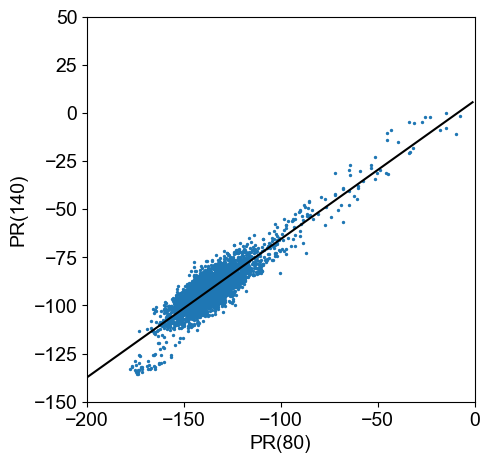

In [75]:
plt.figure(figsize=(5, 5))
plt.scatter(PR80, PR140, s=2)

reg_x_pr = np.arange(-200, 0, 1)

reg_y_pr = slope_pr * reg_x_pr + intercept_pr
plt.plot(reg_x_pr, reg_y_pr, 'k')

plt.xlim(-200, 0)
plt.ylim(-150, 50)

plt.xlabel('PR(80)')
plt.ylabel('PR(140)')

In [77]:
sf = slope_pr
cf = intercept_pr

hu_f_80 = np.mean(PR80)
hu_f_140 = (hu_f_80) * sf
hu_x_80 = -792.2258608008326
hu_x_140 = -927.705123168987

In [78]:
A = np.array([[hu_f_80, hu_x_80],
              [hu_f_140, hu_x_140]])
print(A)
AINV = np.linalg.inv(A)
print(AINV)

[[-136.06575122 -792.2258608 ]
 [ -97.71311417 -927.70512317]]
[[-0.01900333  0.01622814]
 [ 0.00200158 -0.0027872 ]]


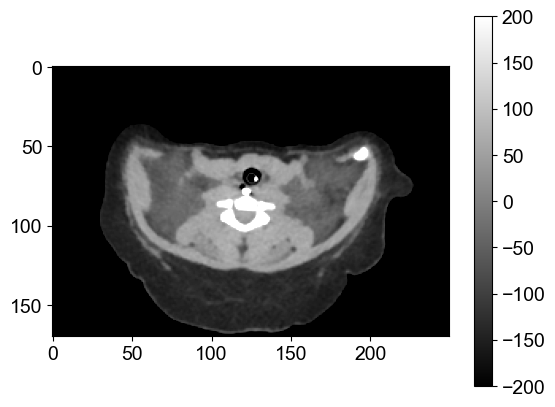

In [79]:
plt.imshow(registered_low_post_maps[idx, ...], cmap='gray', vmin=-200, vmax=200)
plt.colorbar()
plt.show()

In [102]:
basic_mask = registered_low_post_maps[idx, ...] > -900

sample_low = np.where(basic_mask, registered_low_post_maps[idx, ...], -100)
sample_high = np.where(basic_mask, registered_high_post_maps[idx, ...], -100)

sample_flat = np.vstack((sample_low.reshape(1, -1), sample_high.reshape(1, -1)))
decomp_flat = np.matmul(AINV, sample_flat)
material1 = decomp_flat[0].reshape(sample_low.shape)
material2 = decomp_flat[1].reshape(sample_low.shape)


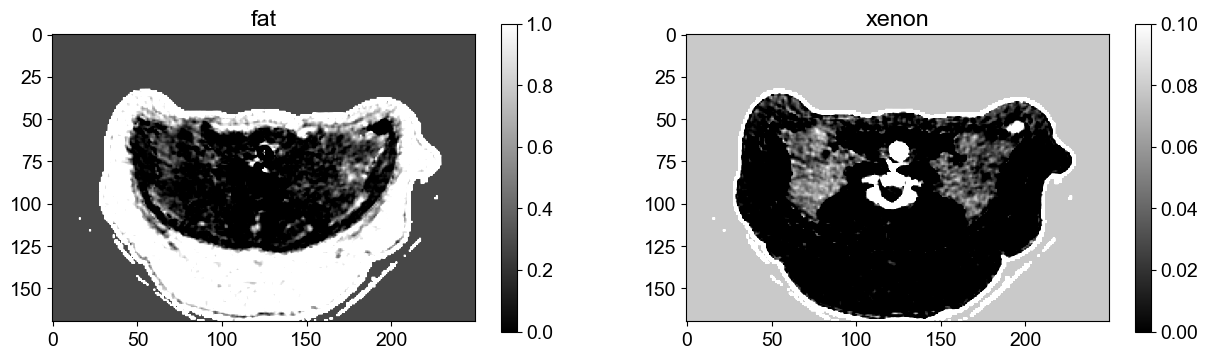

In [112]:

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(material1, cmap='gray', vmin=0, vmax=1)
plt.title('fat')
plt.colorbar()

plt.subplot(122)
plt.imshow(material2, cmap='gray', vmin=0, vmax=0.1)
plt.title('xenon')
plt.colorbar()